In [20]:
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

In [23]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dhanush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhanush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dhanush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
# Load the text data
file_path = './Data/agatha.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

In [38]:
# Preprocess the text
# Tokenization
words = word_tokenize(text.lower())
words

['agatha',
 'christie',
 '-',
 'death',
 'on',
 'the',
 'nile',
 'part',
 'one',
 'chapter',
 '1',
 'linnet',
 'ridgeway',
 '!',
 '``',
 'that',
 "'s",
 'her',
 '.',
 "''",
 'said',
 'mr.',
 'burnaby',
 ',',
 'the',
 'landlord',
 'of',
 'the',
 'three',
 'crowns',
 '.',
 'he',
 'nudged',
 'his',
 'companion',
 '.',
 'the',
 'two',
 'men',
 'stared',
 'with',
 'round',
 'bucolic',
 'eyes',
 'and',
 'slightly',
 'open',
 'mouths',
 '.',
 'a',
 'big',
 'scarlet',
 'rolls-royce',
 'had',
 'just',
 'stopped',
 'in',
 'front',
 'of',
 'the',
 'local',
 'post',
 'office',
 '.',
 'a',
 'girl',
 'jumped',
 'out',
 ',',
 'a',
 'girl',
 'without',
 'a',
 'hat',
 'and',
 'wearing',
 'a',
 'frock',
 'that',
 'looked',
 '(',
 'but',
 'only',
 'looked',
 ')',
 'simple',
 '.',
 'a',
 'girl',
 'with',
 'golden',
 'hair',
 'and',
 'straight',
 'autocratic',
 'features',
 '--',
 'a',
 'girl',
 'with',
 'a',
 'lovely',
 'shape',
 '--',
 'a',
 'girl',
 'such',
 'as',
 'was',
 'seldom',
 'seen',
 'in',
 'ma

In [40]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.isalnum() and word not in stop_words]
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [41]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in words]
words

['agatha',
 'christie',
 'death',
 'nile',
 'part',
 'one',
 'chapter',
 '1',
 'linnet',
 'ridgeway',
 'said',
 'burnaby',
 'landlord',
 'three',
 'crown',
 'nudged',
 'companion',
 'two',
 'men',
 'stared',
 'round',
 'bucolic',
 'eye',
 'slightly',
 'open',
 'mouth',
 'big',
 'scarlet',
 'stopped',
 'front',
 'local',
 'post',
 'office',
 'girl',
 'jumped',
 'girl',
 'without',
 'hat',
 'wearing',
 'frock',
 'looked',
 'looked',
 'simple',
 'girl',
 'golden',
 'hair',
 'straight',
 'autocratic',
 'feature',
 'girl',
 'lovely',
 'shape',
 'girl',
 'seldom',
 'seen',
 'maltonunderwode',
 'quick',
 'imperative',
 'step',
 'passed',
 'post',
 'office',
 'said',
 'burnaby',
 'went',
 'low',
 'awed',
 'voice',
 'million',
 'got',
 'going',
 'spend',
 'thousand',
 'place',
 'swimming',
 'pool',
 'going',
 'italian',
 'garden',
 'ballroom',
 'half',
 'house',
 'pulled',
 'rebuilt',
 'bring',
 'money',
 'town',
 'said',
 'friend',
 'lean',
 'man',
 'tone',
 'envious',
 'grudging',
 'burnaby',

In [43]:
# Join words back into a single string
processed_text = ' '.join(words)
processed_text

'agatha christie death nile part one chapter 1 linnet ridgeway said burnaby landlord three crown nudged companion two men stared round bucolic eye slightly open mouth big scarlet stopped front local post office girl jumped girl without hat wearing frock looked looked simple girl golden hair straight autocratic feature girl lovely shape girl seldom seen maltonunderwode quick imperative step passed post office said burnaby went low awed voice million got going spend thousand place swimming pool going italian garden ballroom half house pulled rebuilt bring money town said friend lean man tone envious grudging burnaby agreed yes great thing great thing burnaby complacent wake u proper added bit difference sir george said ah said burnaby indulgently never luck get place cool sixty thousand heard lean man whistled burnaby went triumphantly say spent another sixty thousand finished wicked said lean man get money america heard mother daughter one millionaire bloke quite like picture girl came 

In [44]:
# Compute TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([processed_text])
tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.toarray()[0]))
tfidf_scores

{'10': 0.0005622129471760573,
 '11': 0.0005622129471760573,
 '12': 0.0005622129471760573,
 '13': 0.0005622129471760573,
 '14': 0.0005622129471760573,
 '15': 0.0005622129471760573,
 '16': 0.0005622129471760573,
 '17': 0.0005622129471760573,
 '18': 0.0005622129471760573,
 '1879': 0.0011244258943521146,
 '19': 0.0005622129471760573,
 '20': 0.0005622129471760573,
 '21': 0.0005622129471760573,
 '22': 0.0011244258943521146,
 '23': 0.0005622129471760573,
 '24': 0.0005622129471760573,
 '25': 0.0005622129471760573,
 '26': 0.0005622129471760573,
 '27': 0.0005622129471760573,
 '28': 0.0005622129471760573,
 '29': 0.0005622129471760573,
 '30': 0.0005622129471760573,
 '41': 0.0005622129471760573,
 '4th': 0.0005622129471760573,
 '7ou': 0.0005622129471760573,
 'aad': 0.0005622129471760573,
 'aback': 0.001686638841528172,
 'abandoned': 0.0005622129471760573,
 'abandoning': 0.0005622129471760573,
 'abatement': 0.0005622129471760573,
 'able': 0.010119833049169032,
 'aboard': 0.003935490630232402,
 'abroa

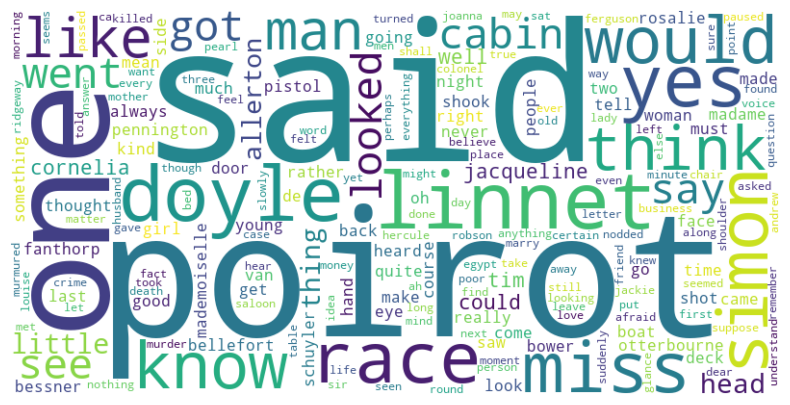

In [30]:
# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()